In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import os
import sys
sys.path.append(os.path.abspath("../lib"))
from show import compare_repartition, histo_continuous

In [ ]:
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = "notebook"
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
os.environ['PYSPARK_PYTHON'] = sys.executable

spark = SparkSession \
    .builder \
    .appName("renovation") \
    .getOrCreate()

# set this parameter for date issue before 1582 (dpe database)
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [ ]:
# import files
# File location and type
file_location_array = [
    {"location": "../training/pred_tremi.csv",
        "name": "pred_tremi_full", "delimiter": ","},
    {"location": "../training/dico.csv", "name": "dictionary", "delimiter": "\t"}
]
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
dataframes = {}

# The applied options are for CSV files. For other file types, these will be ignored.
for file in file_location_array:
    delimiter = file["delimiter"]
    file_location = file["location"]
    name = file["name"]
    dataframes[file["name"]] = (
        spark.read.format(file_type)
        .option("inferSchema", infer_schema)
        .option("header", first_row_is_header)
        .option("sep", delimiter)
        .load(file_location)
    )

In [ ]:
# name the important datasets and cast to type
training_tremi = (
    dataframes['pred_tremi_full'].withColumns({
        'surface': F.col('surface').cast('int'),
        'heating_production': F.col('heating_production').cast('int'),
    })
)

dictionary = dataframes['dictionary']

In [ ]:
# split training and prediction datasets
training_surf = training_tremi.filter(F.col('surface').isNotNull()).drop(
    'heating_production')
predicting_surf = training_tremi.filter(F.col('surface').isNull()).drop(
    'heating_production')

training_prod = training_tremi.filter(
    F.col('heating_production').isNotNull()).drop('surface')
predicting_prod = training_tremi.filter(
    F.col('heating_production').isNull()).drop('surface')

print(f"""
{training_surf.count() =}
{predicting_surf.count() =}\n
{training_prod.count() =}
{predicting_prod.count() =}\n
""")


training_surf.count() =12565
predicting_surf.count() =26933

training_prod.count() =11128
predicting_prod.count() =28370

training_em.count() =12558
predicting_em.count() =26940



# pred_Tremi

c:\Users\arocheteau\OneDrive - ASI\Documents\1_perso\projet\datalake\notebook\pySpark\lib\show.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['%1.2f%%' % i for i in vals])


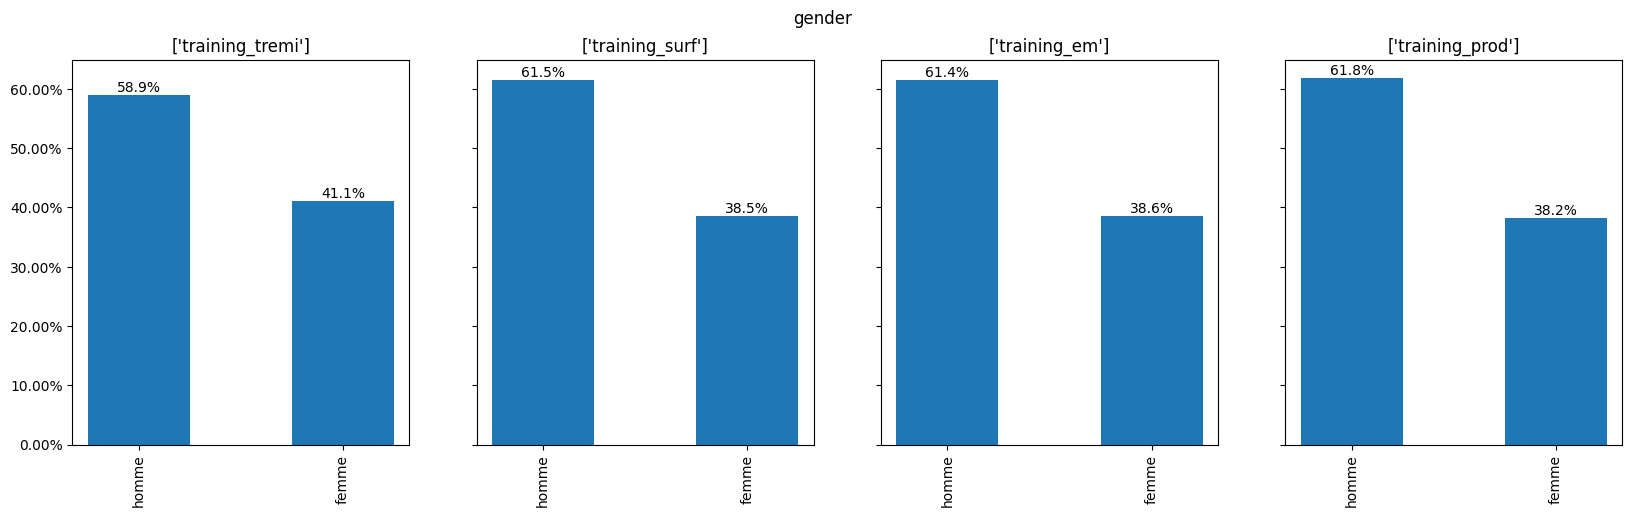

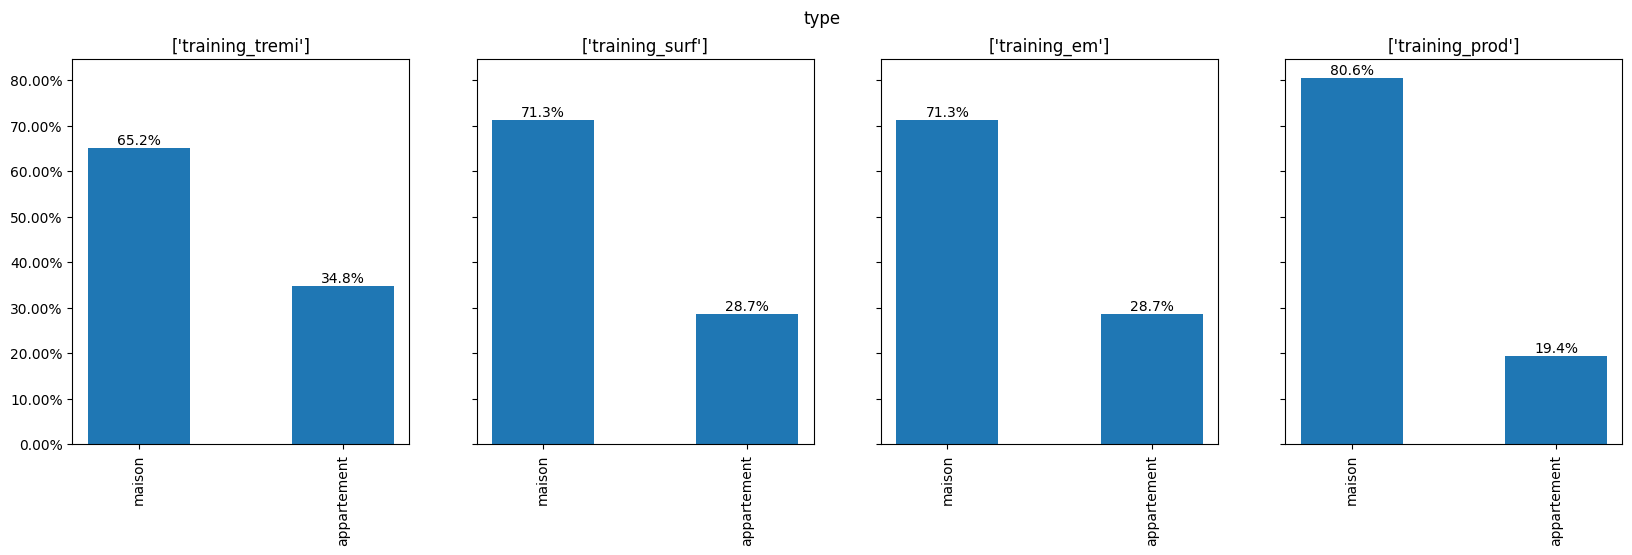

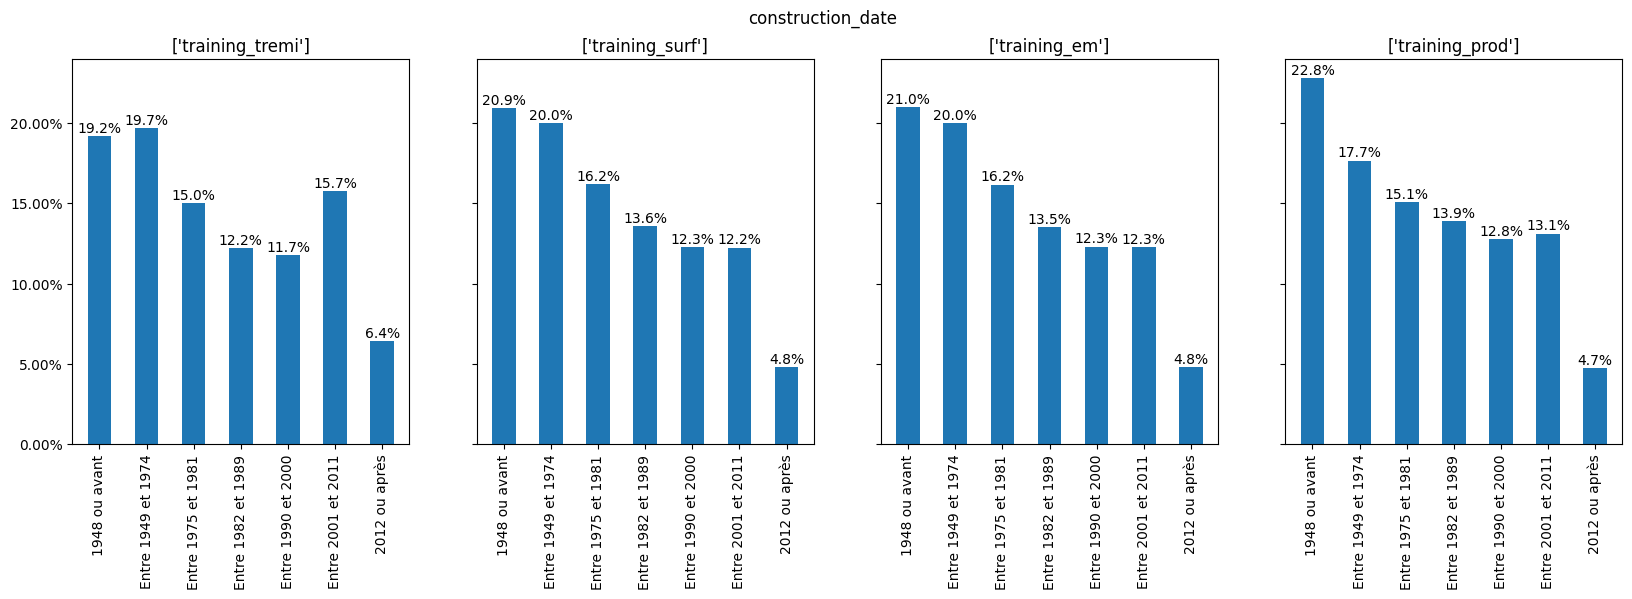

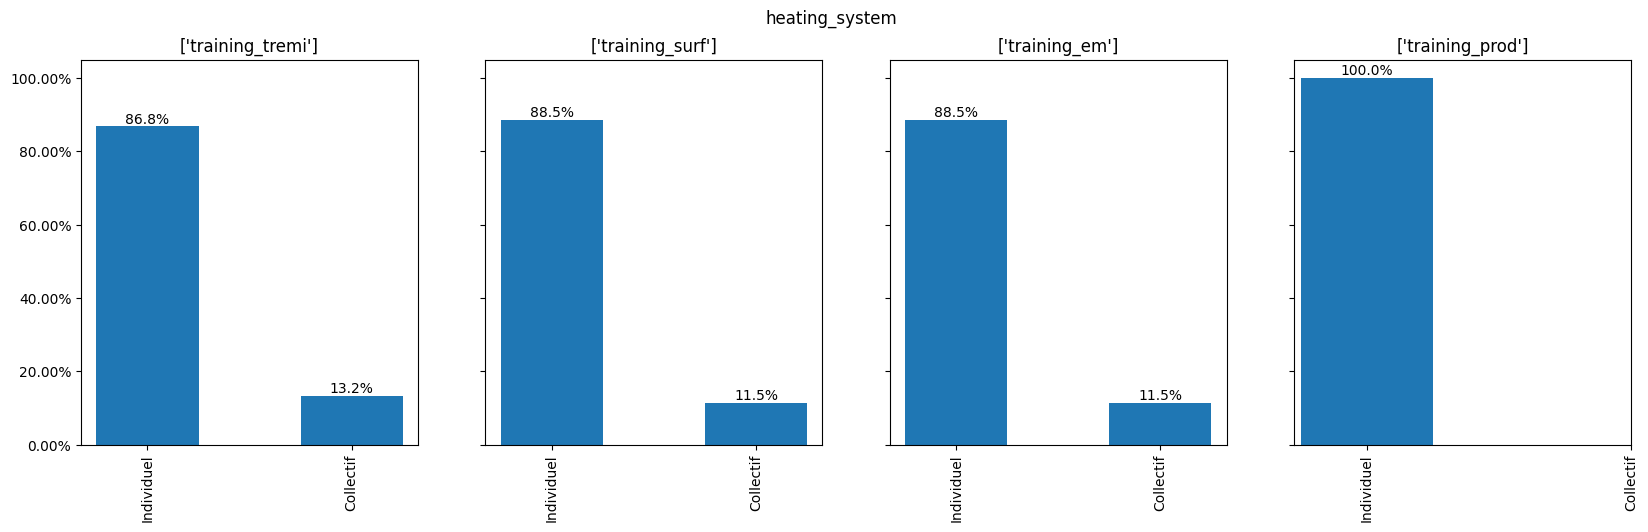

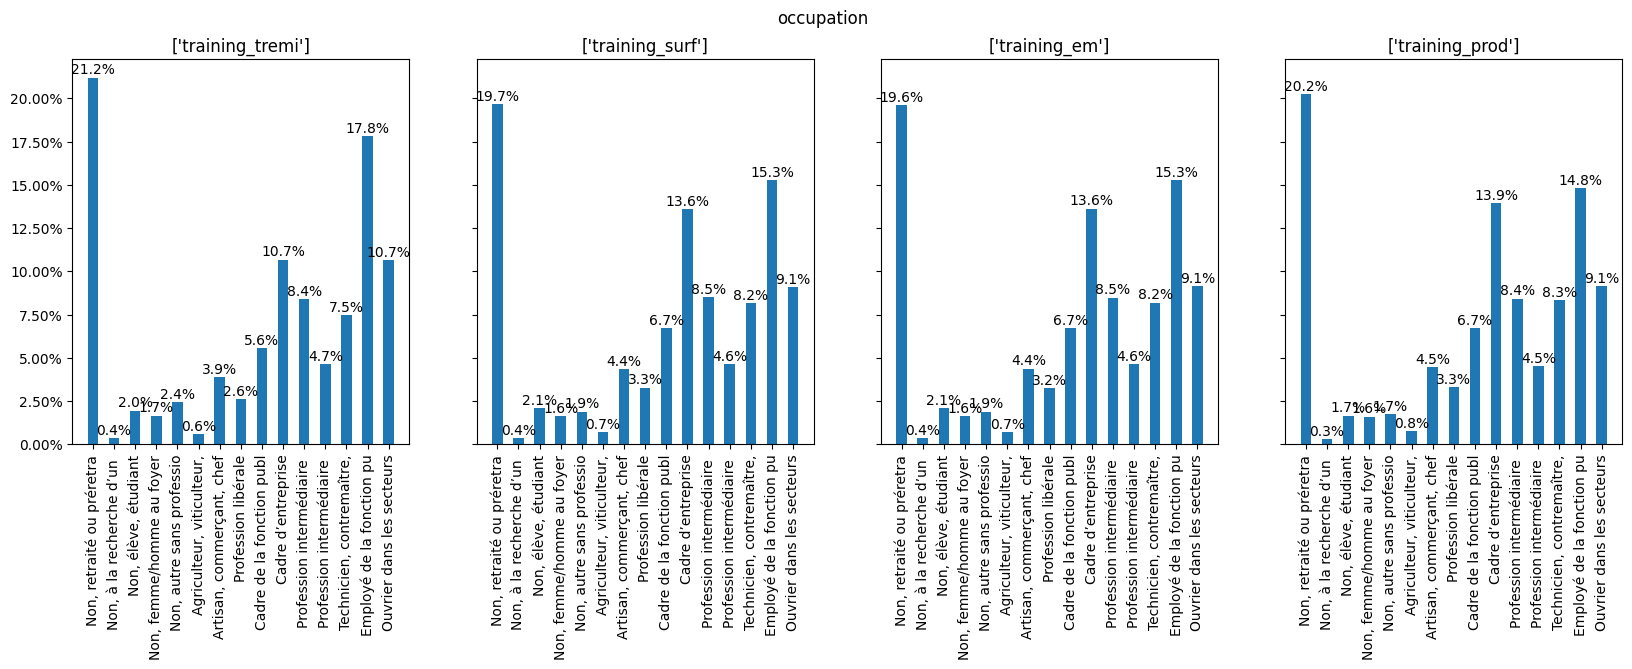

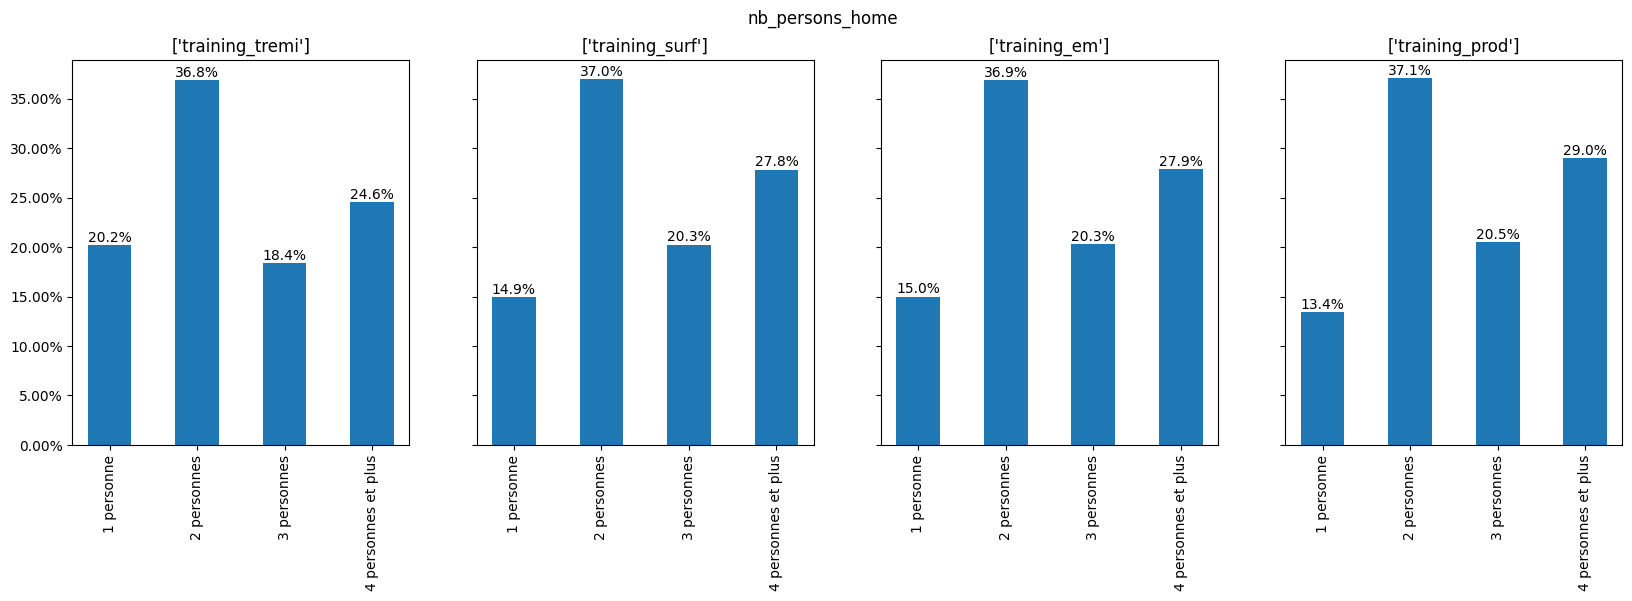

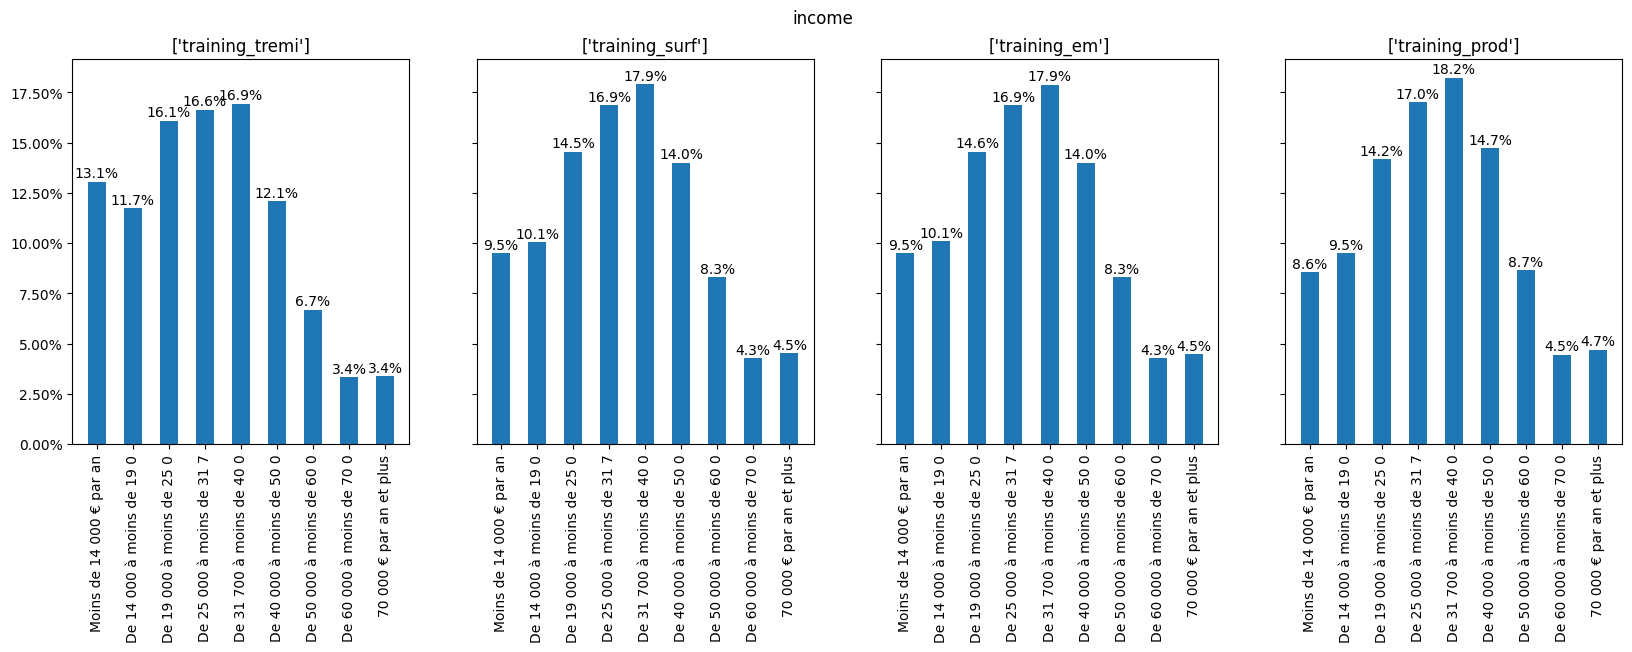

In [ ]:
dfs = [training_tremi, training_surf, training_prod]
compare_repartition(dfs, dictionary, 'gender')
compare_repartition(dfs, dictionary, 'type')
compare_repartition(dfs, dictionary, 'construction_date')
compare_repartition(dfs, dictionary, 'heating_system')
compare_repartition(dfs, dictionary, 'occupation')
compare_repartition(dfs, dictionary, 'nb_persons_home')
compare_repartition(dfs, dictionary, 'income')

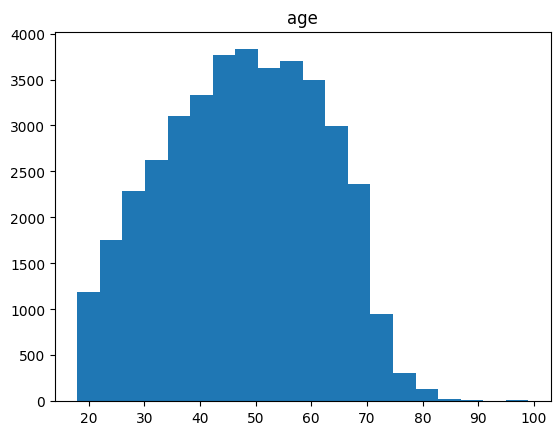

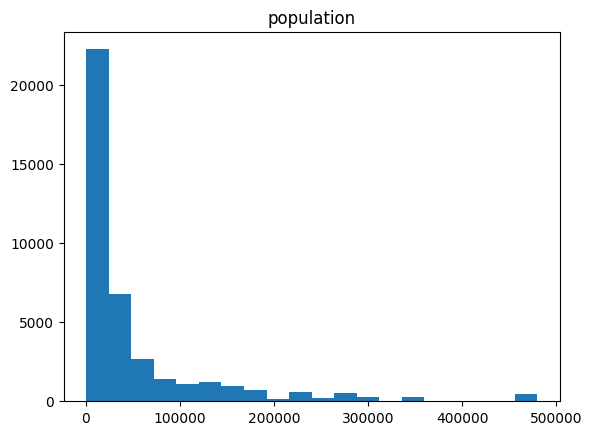

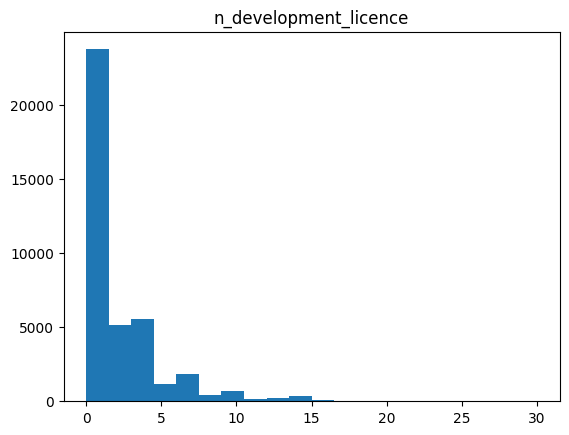

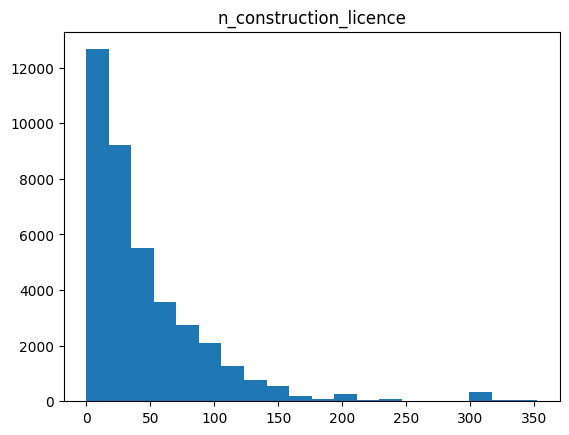

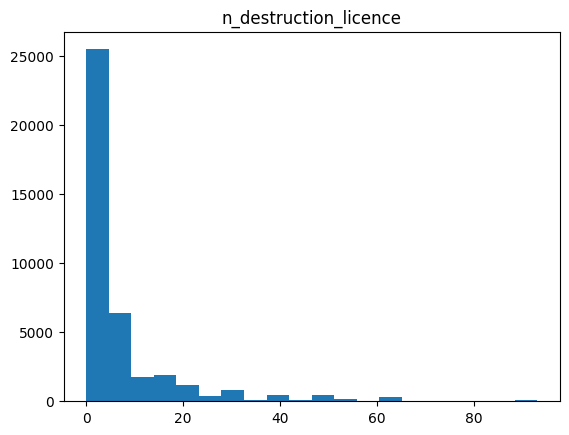

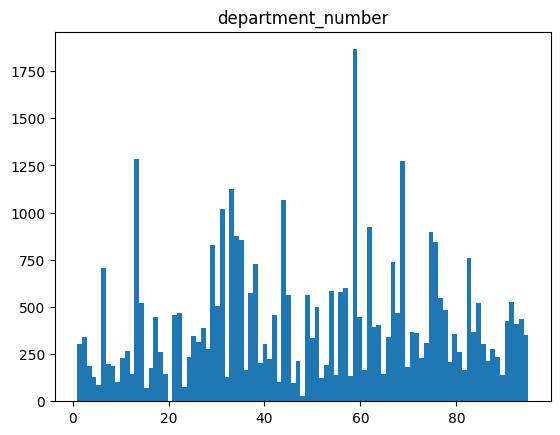

In [ ]:
histo_continuous(training_tremi, 'age')
histo_continuous(training_tremi, 'population')
histo_continuous(training_tremi, 'n_development_licence')
histo_continuous(training_tremi, 'n_construction_licence')
histo_continuous(training_tremi, 'n_destruction_licence')
histo_continuous(training_tremi, 'department_number', 95)

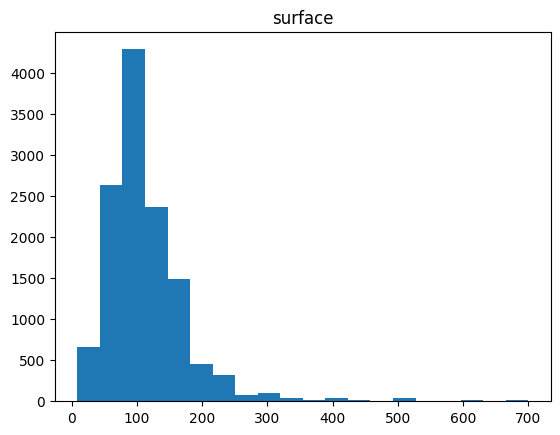

c:\Users\arocheteau\OneDrive - ASI\Documents\1_perso\projet\datalake\notebook\pySpark\lib\show.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['%1.2f%%' % i for i in vals])


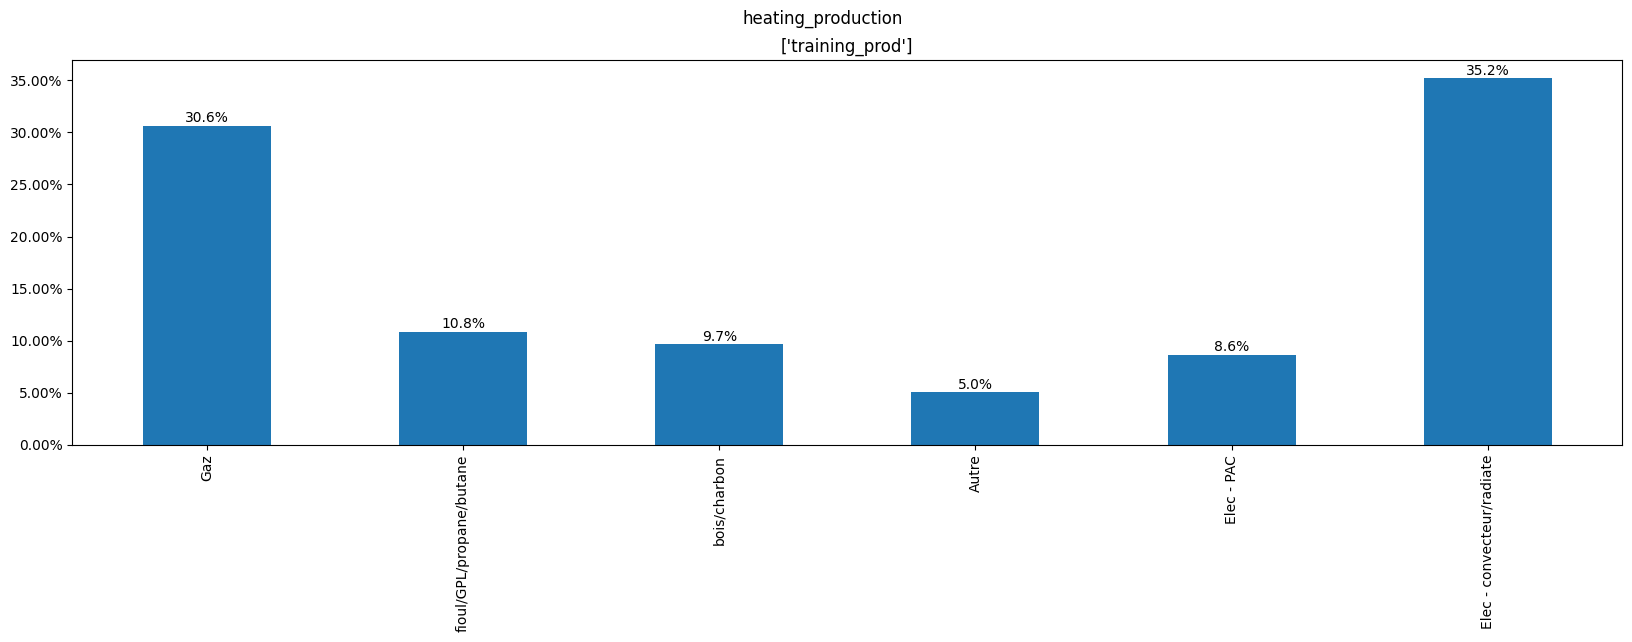

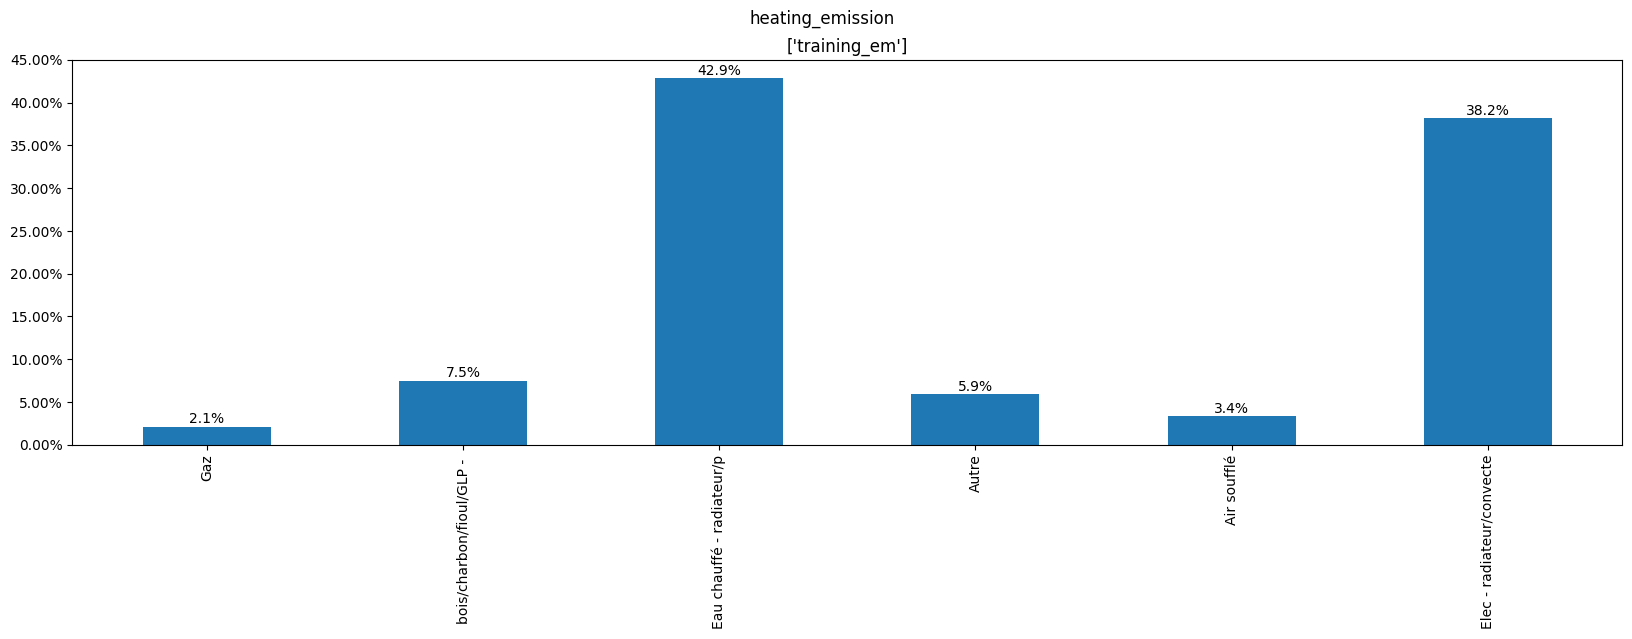

In [ ]:
histo_continuous(training_surf, 'surface')
compare_repartition([training_prod], dictionary, 'heating_production')